In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

In [4]:
asteroid_data = {"orbital_data":{"orbit_id":"44","orbit_determination_date":"2023-06-19 06:58:22","first_observation_date":"2005-08-03","last_observation_date":"2023-06-18","data_arc_in_days":6528,"observations_used":156,"orbit_uncertainty":"0","minimum_orbit_intersection":".0247638","jupiter_tisserand_invariant":"5.071","epoch_osculation":"2460200.5","eccentricity":".3514114685231003","semi_major_axis":"1.252387001217657","inclination":"3.949444703477999","ascending_node_longitude":"128.1863835042944","orbital_period":"511.9248997066613","perihelion_distance":".8122838459605179","perihelion_argument":"309.9445902961252","aphelion_distance":"1.692490156474795","perihelion_time":"2460402.689036058604","mean_anomaly":"217.8149782852802","mean_motion":".703228149688136","equinox":"J2000","orbit_class":{"orbit_class_type":"APO","orbit_class_description":"Near-Earth asteroid orbits which cross the Earth’s orbit similar to that of 1862 Apollo","orbit_class_range":"a (semi-major axis) > 1.0 AU; q (perihelion) < 1.017 AU"}},"is_sentry_object":False}

In [5]:
asteroid_data['orbital_data']

{'orbit_id': '44',
 'orbit_determination_date': '2023-06-19 06:58:22',
 'first_observation_date': '2005-08-03',
 'last_observation_date': '2023-06-18',
 'data_arc_in_days': 6528,
 'observations_used': 156,
 'orbit_uncertainty': '0',
 'minimum_orbit_intersection': '.0247638',
 'jupiter_tisserand_invariant': '5.071',
 'epoch_osculation': '2460200.5',
 'eccentricity': '.3514114685231003',
 'semi_major_axis': '1.252387001217657',
 'inclination': '3.949444703477999',
 'ascending_node_longitude': '128.1863835042944',
 'orbital_period': '511.9248997066613',
 'perihelion_distance': '.8122838459605179',
 'perihelion_argument': '309.9445902961252',
 'aphelion_distance': '1.692490156474795',
 'perihelion_time': '2460402.689036058604',
 'mean_anomaly': '217.8149782852802',
 'mean_motion': '.703228149688136',
 'equinox': 'J2000',
 'orbit_class': {'orbit_class_type': 'APO',
  'orbit_class_description': 'Near-Earth asteroid orbits which cross the Earth’s orbit similar to that of 1862 Apollo',
  'orbi

In [37]:
def kepler_equation(eccentricity, mean_anomaly, tol=1e-10, max_iter=1000):
    # Initial guess for eccentric anomaly
    eccentric_anomaly = mean_anomaly

    for _ in range(max_iter):
        # Kepler's equation
        f = eccentric_anomaly - eccentricity * np.sin(eccentric_anomaly) - mean_anomaly
        # Derivative of Kepler's equation
        f_prime = 1 - eccentricity * np.cos(eccentric_anomaly)

        # Update eccentric anomaly using Newton's method
        eccentric_anomaly -= f / f_prime

        # Check for convergence
        if abs(f) < tol:
            break

    # Calculate true anomaly from eccentric anomaly
    true_anomaly = 2 * np.arctan2(np.sqrt(1 + eccentricity) * np.sin(eccentric_anomaly / 2),
                                  np.sqrt(1 - eccentricity) * np.cos(eccentric_anomaly / 2))

    return true_anomaly


<IPython.core.display.Javascript object>


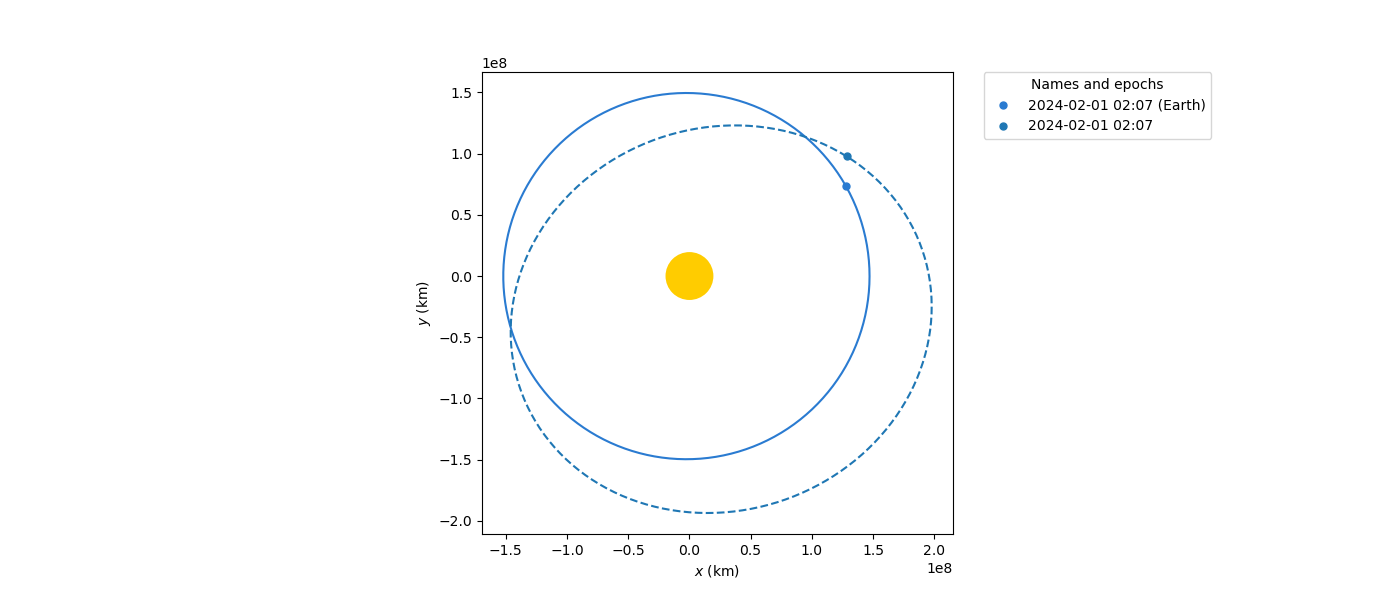

In [59]:
from poliastro.bodies import Sun, Earth
from poliastro.frames import Planes
from poliastro.plotting import StaticOrbitPlotter
from poliastro.twobody import Orbit
from poliastro.ephem import Ephem
from astropy.time import Time
import matplotlib.pyplot as plt

earth_semimajor_axis = 1.0 #AU 
earth_eccentricity = 0.0167 

asteroid_semimajor_axis = float(asteroid_data['orbital_data']['semi_major_axis'])
asteroid_eccentricity =  float(asteroid_data['orbital_data']['eccentricity'])
asteroid_inclination = float(asteroid_data['orbital_data']['inclination'])
asteroid_right_ascension = float(asteroid_data['orbital_data']['ascending_node_longitude'])
asteroid_argp = float(asteroid_data['orbital_data']['perihelion_argument'])
asteroid_nu = kepler_equation(asteroid_eccentricity, float(asteroid_data['orbital_data']['mean_anomaly']))


date_time = Time('2024-02-01 02:07:00', scale='tdb')

# earth_ephem = Ephem.from_body(Earth, date_time)
# print(earth_ephem.rv(date_time).position)
# earth_position = earth_ephem.rv(date_time).position

plotter = StaticOrbitPlotter(plane=Planes.EARTH_ECLIPTIC)
plotter.plot_body_orbit(Earth, date_time, label="Earth")

# asteroid = Orbit.from_classical(attractor=Sun, a=asteroid_semimajor_axis, ecc=asteroid_eccentricity, inc=asteroid_inclination, raan = asteroid_right_ascension, argp=asteroid_argp, nu=asteroid_nu, epoch=date_time)
asteroid = Orbit.from_sbdb(3421513)
asteroid = asteroid.propagate(date_time)
# ganymed = Orbit.from_sbdb("1036")  # Ganymed IAU number
plotter.plot(asteroid)
